In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

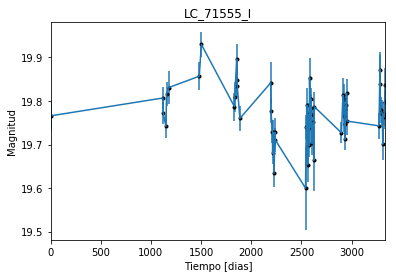

In [2]:
data = np.genfromtxt('LC_71555_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71555_I')
plt.savefig("LC_71555_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

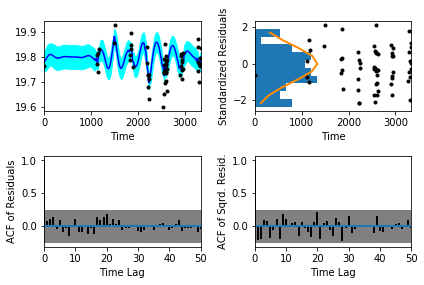

In [5]:
sample.assess_fit()

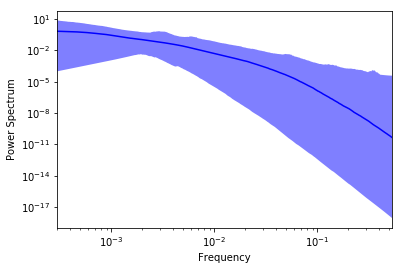

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

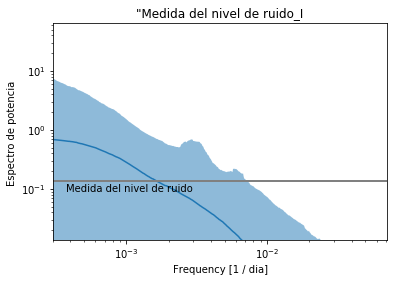

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_71555_G')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_71555_I')

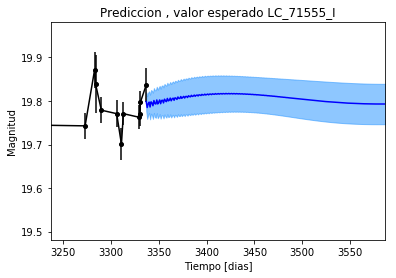

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_71555_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_71555_I')

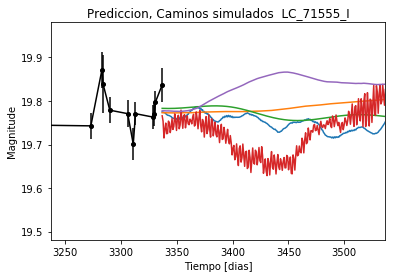

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_71555_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


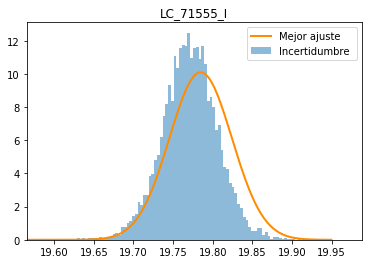

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71555_I')
plt.savefig("Mejor_ajuste_LC_71555_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_71555_I')

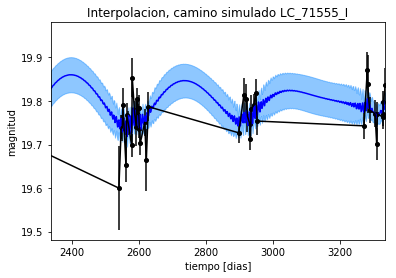

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_I')

Text(0.5,1,'Interpolacion, camino simulado LC_71555_I')

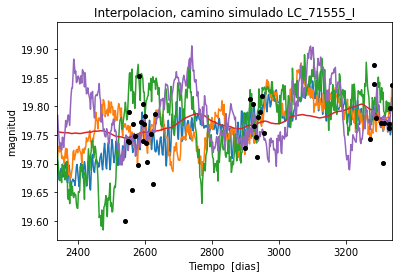

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 854.325857747
Median: 0.00863402234598
Standard deviation: 0.172162734262
68% credibility interval: [ 0.00097366  0.13667201]
95% credibility interval: [  3.60577286e-04   6.64465048e-01]
99% credibility interval: [  3.06339082e-04   9.73993251e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 753.931688553
Median: 0.0030207350948
Standard deviation: 0.0758282137426
68% credibility interval: [ 0.00055497  0.03450784]
95% credibility interval: [ 0.00032777  0.23321322]
99% credibility interval: [  3.03541535e-04   4.95111565e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 979.017199727
Median: 0.0389311083903
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1247.84370833
Median: 125.946150056
Standard deviation: 1.62080743583
68% credibility interval: [ 124.18968549  127.02147258]
95% credibility interval: [ 121.70106421  128.22592737]
99% credibility interval: [ 119.8254551   129.71242793]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1193.30977775
Median: 0.750724367146
Standard deviation: 2.18747120749
68% credibility interval: [ 0.07246541  3.95237855]
95% credibility interval: [ 0.01784766  7.26044891]
99% credibility interval: [ 0.01101075  9.90599479]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 545.021167598
Median: 0.702631217978
Standard deviation: 10.2188241187
68% credibility interval: [  0.03036319  11.45954607]
95% credibility interval: [  1.26340144e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11198.7791146
Median: 5.23782930997e-17
Standard deviation: 1.78376867851e+89
68% credibility interval: [  5.74173929e-99   4.91649908e+20]
95% credibility interval: [  4.27106579e-141   8.85895299e+067]
99% credibility interval: [  5.52722343e-213   1.31969880e+086]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3440.25044917
Median: 19.7803834668
Standard deviation: 0.0262370233294
68% credibility interval: [ 19.76112647  19.80098678]
95% credibility interval: [ 19.73215415  19.83659306]
99% credibility interval: [ 19.69843461  19.87577073]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 639.226467536
Median: 0.03802519747
Standard deviation: 0.273828617826
68% credibility interval: [ 0.          0.42811288]
95% credibility interval: [ 0.          0.99427865]
99% credibility interval: [ 0.          1.05023738]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 639.226467536
Median: 0.03802519747
Standard deviation: 0.273828617826
68% credibility interval: [ 0.          0.42811288]
95% credibility interval: [ 0.          0.99427865]
99% credibility interval: [ 0.          1.05023738]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1496.56003916
Median: 0.0
Standard deviation: 0.00221432047602
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1247.84370833
Median: 125.946150056
Standard deviation: 1.62080743583
68% credibility interval: [ 124.18968549  127.02147258]
95% credibility interval: [ 121.70106421  128.22592737]
99% credibility interval: [ 119.8254551   129.71242793]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2035.32485735
Median: 0.002800250423
Standard deviation: 0.00368391222273
68% credibility interval: [ 0.00163019  0.00521682]
95% credibility interval: [ 0.000938    0.01196564]
99% credibility interval: [ 0.00063775  0.0229747 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1283.64905639
Median: 1.33943900266
Standard deviation: 0.231242441633
68% credibility interval: [ 1.11415149  1.58254041]
95% credibility interval: [ 0.92438587  1.82420577]
99% credibility interval: [ 0.82621525  1.9511104 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1280.14226084
Median: 4.08457762579e-05
Standard deviation: 0.111174737912
68% credibility interval: [  7.85507588e-24   8.23587810e-03]
95% credibility interval: [  6.01938584e-74   2.30348288e-01]
99% credibility interval: [  9.85101713e-90   8.09239186e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 854.325857747
Median: (-0.0542491623461-2.20717822498j)
Standard deviation: 2.03231781591
68% credibility interval: [-0.85873555-0.91711574j -0.00611768-0.4680833j ]
95% credibility interval: [ -4.17495703e+00+0.j          -2.26557391e-03-2.84836819j]
99% credibility interval: [ -6.11978008e+00+0.j         -1.92478522e-03-0.0376087j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 753.931688553
Median: (-0.0189798383645+0j)
Standard deviation: 1.78526546822
68% credibility interval: [-0.21681913+0.27197068j -0.00348696+0.j        ]
95% credibility interval: [-1.46532185+0.77194051j -0.00205941+0.j        ]
99% credibility interval: [ -3.11087771e+00 +4.85452956e+00j  -1.90720771e-03 +1.68701254e-04j]
Posterior summary 